<a href="https://colab.research.google.com/github/Valent11-15/Parte-Pr-ctica-Parcial-3/blob/main/PARTE_PR%C3%81CTICA_TERCER_PARCIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files #para cargar archivos en google colab
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats


Integrantes:

*   Nasly Valentina Villamizar Rivera-2230123

*   Victor David Duran Rodríguez-2230142
*   Silvia Andrea Ardila Gómez 2230136


*   Danna Lizeth Arias Gelvez-2222648



# Estadística descriptiva para variables cualitativas



*   Gráficos para datos de una variable cualitativa
*   Proporciones asociadas a los valores de una variable cualitativa


En esta investigación se busca hacer un análisis exploratorio de dos variables importantes: el "tiempo de gestación" (T_GES) y la "talla de nacimiento" (TALLA_NAC), tomando como base los nacimientos vivos que se registraron en Colombia durante el año 2023. Para ello, se utilizará la base de datos de Estadísticas Vitales (EEVV), elaborada por el Departamento Administrativo Nacional de Estadística (DANE). Estas variables tienen un papel clave en temas de salud pública y demografía, ya que su análisis ayuda a detectar patrones, comportamientos y posibles riesgos que puedan influir en los resultados al momento del nacimiento.

Antes de entrar en el análisis estadístico, fue necesario realizar una limpieza detallada de los datos. Este paso fue fundamental para asegurar que la información usada sea confiable y representativa. Se eliminaron datos que no aportaban o que estaban incompletos, siguiendo criterios y recomendaciones de expertos en manejo de bases estadísticas. Más adelante se explicará con detalle cómo se hizo esta limpieza y por qué se tomaron ciertas decisiones.

La base de datos utilizada, proporcionada por el DANE, es una fuente oficial y muy completa sobre eventos vitales en Colombia. En este estudio se trabajará únicamente con los datos de nacimientos del año 2023, los cuales se obtuvieron respetando los protocolos de acceso establecidos por esta entidad. Esta base permite estudiar muchas características de cada nacimiento, pero en este caso el enfoque estará en la duración del embarazo y la talla del recién nacido.

El análisis de datos permite transformar información en conocimiento útil. A través de herramientas estadísticas, tanto descriptivas como inferenciales, se pueden identificar relaciones y tendencias dentro de los datos. En este trabajo se aplicarán métodos descriptivos para mostrar cómo se comportan las variables T_GES y TALLA_NAC, usando gráficos y proporciones. Además, se analizará si existe alguna relación entre ambas, utilizando tablas de contingencia y pruebas estadísticas adecuadas. Finalmente, se interpretarán los resultados dentro del contexto colombiano y se presentarán conclusiones basadas en lo que muestran los datos.

**GRÁFICOS PARA DATOS DE UNA VARIABLE CUALITATIVA: T_GES Y TALLA_NAC**

In [ ]:
uploaded = files.upload()

Saving BD-EEVV-Nacimientos-2023.csv to BD-EEVV-Nacimientos-2023.csv


In [ ]:
io_csv = io.BytesIO(uploaded['BD-EEVV-Nacimientos-2023.csv'])
tabla = pd.read_csv(io_csv, sep = ",", index_col=0, encoding='latin-1')
tabla.head(3)

,COD_MUNIC,AREANAC,SIT_PARTO,OTRO_SIT,SEXO,PESO_NAC,TALLA_NAC,ANO,MES,ATEN_PAR,...,N_HIJOSV,FECHA_NACM,N_EMB,SEG_SOCIAL,IDCLASADMI,EDAD_PADRE,NIV_EDUP,ULTCURPAD,PROFESION,TIPOFORMULARIO
COD_DPTO,,,,,,,,,,,,,,,,,,,,,
23,417,1,1,NaN,1,8,5,2023,1,1,...,2,25/09/2015,2,2,2.0,44,99,99,1.0,1
11,1,1,1,NaN,2,6,4,2023,2,1,...,1,NaN,1,1,1.0,35,11,3,1.0,1
11,1,1,1,NaN,1,6,4,2023,7,1,...,1,NaN,1,1,1.0,32,9,6,1.0,1


In [ ]:
tabla1 = tabla[["T_GES", "TALLA_NAC"]]
tabla1.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5


In [ ]:
df2 = tabla1[(tabla1.T_GES != 9) & (tabla1.TALLA_NAC != 9)]
df2.head(4)

,T_GES,TALLA_NAC
COD_DPTO,,
23,4,5
11,4,4
11,4,4
11,4,5


In [ ]:
df2.T_GES.head(2)
df2.T_GES = df2.T_GES.astype(str)
df2.T_GES.head(2)

<ipython-input-29-e608aef629bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.T_GES = df2.T_GES.astype(str)


,T_GES
COD_DPTO,
23,38-41
11,38-41


In [ ]:
df2.TALLA_NAC.head(2)
df2.TALLA_NAC = df2.TALLA_NAC.astype(str)
df2.TALLA_NAC.head(2)

<ipython-input-28-4ae3ab049010>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.TALLA_NAC = df2.TALLA_NAC.astype(str)


,TALLA_NAC
COD_DPTO,
23,40-49
11,40-49


In [ ]:
df2.loc[(df2.T_GES == "1"), "T_GES"] = "22>"
df2.loc[(df2.T_GES == "2"), "T_GES"] = "22-27"
df2.loc[(df2.T_GES == "3"), "T_GES"] = "28-37"
df2.loc[(df2.T_GES == "4"), "T_GES"] = "38-41"
df2.loc[(df2.T_GES == "5"), "T_GES"] = "42<"
df2.loc[(df2.T_GES == "6"), "T_GES"] = "ignorado"
df2.loc[(df2.T_GES == "9"), "T_GES"] = "NA"

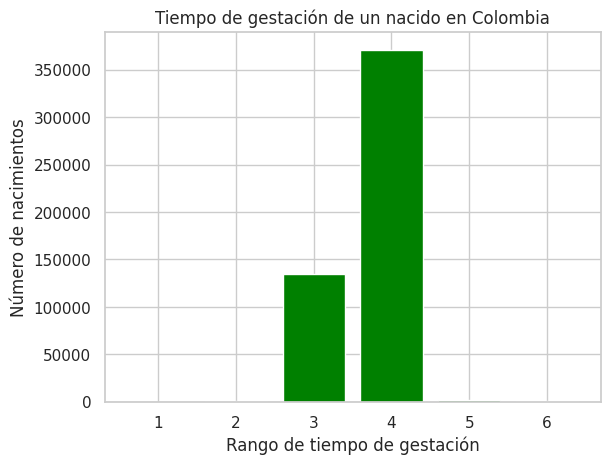

In [ ]:
#Gráfico de barras de la variable T_GES
x_values1 = df2.T_GES.unique()
y_values1 = df2.T_GES.value_counts().tolist()
plt.bar(x_values1, y_values1, color = "green")
plt.title('Tiempo de gestación de un nacido en Colombia')
ax = plt.subplot() # Axis
ax.set_xlabel('Rango de tiempo de gestación')
ax.set_ylabel('Número de nacimientos')
plt.show()

El tiempo de gestación de 38 a 41 es el rango de tiempo de gestación de un nacido en Colombia, donde se tienen alrededor de 350000 nacimientos. En el rango de tiempo de gestación de 28 a 37 se tienen aproximadamente 140000 nacimientos en Colombia. Los rangos de tiempo de gestación de 42 y más, de 22 a 27, ignorado y menos de 22 tiene menos de 50000 nacimientos.

In [ ]:
sizes = np.array(y_values1)
sizes

array([371090, 134513,   1950,    778,    477,     19])

Text(0.5, 1.0, 'Proporción de nacimientos por tiempo de gestación')

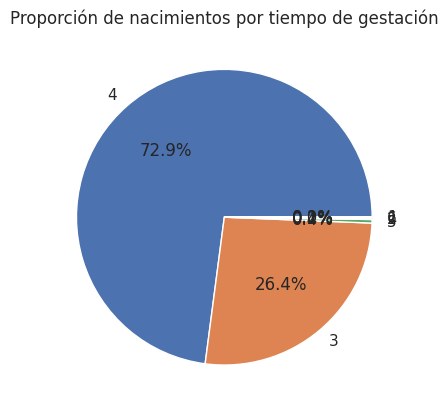

In [ ]:
#Diagrama círcular de la varible T_GES
plt.pie(y_values1, labels = x_values1, autopct='%1.1f%%')
plt.title('Proporción de nacimientos por tiempo de gestación')

In [ ]:
len(df2.T_GES)

508827

In [ ]:
porcentaje = [(x/len(df2.T_GES)*100) for x in y_values1]
print(x_values1)
print(porcentaje)

[4 3 5 2 6 1]
[72.93048521403149, 26.43590061062011, 0.383234380251048, 0.1529006911975976, 0.09374502532294866, 0.003734078576805083]


Aproximadamente el 72.93% de los nacidos vivos en Colombia tienen un tiempo de gestación entre 38 a 41 semanas. El 26.43% tiene un tiempo de gestación entre 28 a 37 semanas. El 0.38% tiene un tiempo de 42 y más semanas. El 0.15% tiene un tiempo de 22 a 27 semanas. El 0.09% no se registró o no se pudo determinar el tiempo de gestación. El 0.003% tiene un tiempo de menos de 22 semanas.

In [ ]:
df2.loc[(df2.TALLA_NAC == "1"), "TALLA_NAC"] = "20 >"
df2.loc[(df2.TALLA_NAC == "2"), "TALLA_NAC"] = "20-29"
df2.loc[(df2.TALLA_NAC == "3"), "TALLA_NAC"] = "30-39"
df2.loc[(df2.TALLA_NAC == "4"), "TALLA_NAC"] = "40-49"
df2.loc[(df2.TALLA_NAC == "5"), "TALLA_NAC"] = "50-59"
df2.loc[(df2.TALLA_NAC == "6"), "TALLA_NAC"] = "60<"
df2.loc[(df2.TALLA_NAC == "9"), "TALLA_NAC"] = "NA"

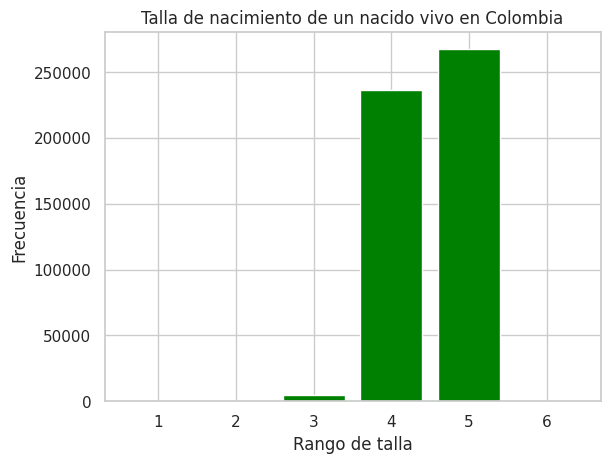

In [ ]:
#Gráfico de barras de la variable TALLA_NAC
x_values2 = df2.TALLA_NAC.unique()
y_values2 = df2.TALLA_NAC.value_counts().tolist()
plt.bar(x_values2, y_values2, color = "green")
plt.title('Talla de nacimiento de un nacido vivo en Colombia')
ax = plt.subplot() # Axis
ax.set_xlabel('Rango de talla')
ax.set_ylabel('Frecuencia')
plt.show()

La talla del nacido vivo, al nacer de 50-59 es el rango de talla más común en Colombia, donde se tienen alrededor de 275000 nacimientos. El rango de la talla del nacido vivo, al nacer de 40-49 se tienen aproximadamente 230000 nacimientos. El rango de talla del nacido vivo, al nacer de 30-39, 20-29,60 y más, menos de 20 se tienen menos de 50000 nacimientos.



In [ ]:
sizes = np.array(y_values2)
sizes

array([267220, 236205,   5071,    307,     20,      4])

Text(0.5, 1.0, 'Proporción de nacimientos por talla')

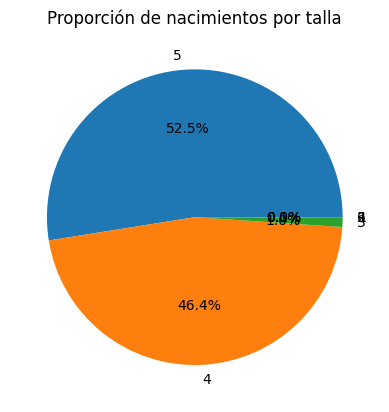

In [ ]:
#Diagrama círcular de la varible TALLA_NAC
plt.pie(y_values2, labels = x_values2, autopct='%1.1f%%')
plt.title('Proporción de nacimientos por talla')

In [ ]:
len(df2.TALLA_NAC)

508827

In [ ]:
porcentaje = [(x/len(df2.TALLA_NAC)*100) for x in y_values2]
print(x_values2)
print(porcentaje)

[5 4 3 2 6 1]
[52.516867225992335, 46.421475275486564, 0.9966059191041355, 0.060334848583113714, 0.0039306090282158765, 0.0007861218056431753]


Aproximadamente el 52.52% de la talla de nacimiento de un nacido vivo en Colombia mide entre 50-59, el 46.42% mide entre 40-49, el 0.996% mide entre 30-39, 0.060% mide entre 20-29, 0.003% mide entre 60 y más, el 0.0007% mide menos de 20.

**PROPORCIONES ASOCIADAS A LOS VALORES DE UNA VARIABLE CUALITATIVA: TABLAS DE CONTINGENCIA**


*   Representación gráfica de una tabla de contingencia
*   Proporciones asociadas a una tabla de contingencia



In [ ]:
df2.loc[(df2.T_GES == 1), "T_GES"] = "22>"
df2.loc[(df2.T_GES == 2), "T_GES"] = "22-27"
df2.loc[(df2.T_GES == 3), "T_GES"] = "28-37"
df2.loc[(df2.T_GES == 4), "T_GES"] = "38-41"
df2.loc[(df2.T_GES == 5), "T_GES"] = "42<"
df2.loc[(df2.T_GES == 6), "T_GES"] = "ignorado"
df2.loc[(df2.T_GES == 9), "T_GES"] = "NA"

df2.loc[(df2.TALLA_NAC == 1), "TALLA_NAC"] = "20 >"
df2.loc[(df2.TALLA_NAC == 2), "TALLA_NAC"] = "20-29"
df2.loc[(df2.TALLA_NAC == 3), "TALLA_NAC"] = "30-39"
df2.loc[(df2.TALLA_NAC == 4), "TALLA_NAC"] = "40-49"
df2.loc[(df2.TALLA_NAC == 5), "TALLA_NAC"] = "50-59"
df2.loc[(df2.TALLA_NAC == 6), "TALLA_NAC"] = "60<"
df2.loc[(df2.TALLA_NAC == 9), "TALLA_NAC"] = "NA"

df2.T_GES, df2.TALLA_NAC = df2.TALLA_NAC.astype(str), df2.T_GES.astype(str)
df2.head(3)

,T_GES,TALLA_NAC
COD_DPTO,,
23,5,4
11,4,4
11,4,4


In [ ]:
tabla_cont = pd.crosstab(df2.T_GES, df2.TALLA_NAC)
tabla_cont

TALLA_NAC,1,2,3,4,5,6
T_GES,,,,,,
1,2,2,0,0,0,0
2,11,251,44,0,0,1
3,5,1646,3357,46,0,17
4,0,50,95455,140106,116,478
5,1,1,35657,230919,360,282
6,0,0,0,19,1,0


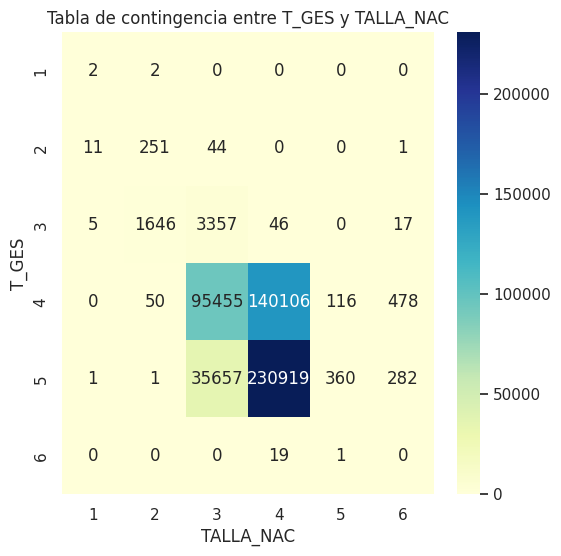

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(6,6))
heatmap = sns.heatmap(tabla_cont, annot=True, fmt= 'd', cmap="YlGnBu", cbar=True)
heatmap.set_title('Tabla de contingencia entre T_GES y TALLA_NAC')
plt.show()

In [ ]:
prob_interseccion_porcentaje = prob_interseccion * 100
print("Tabla de probabilidades de intersección en porcentaje:")
print(prob_interseccion_porcentaje)

Tabla de probabilidades de intersección en porcentaje:
TALLA_NAC         1         2          3          4         5         6
T_GES                                                                  
1          0.000393  0.000393   0.000000   0.000000  0.000000  0.000000
2          0.002162  0.049329   0.008647   0.000000  0.000000  0.000197
3          0.000983  0.323489   0.659753   0.009040  0.000000  0.003341
4          0.000000  0.009827  18.759814  27.535095  0.022798  0.093942
5          0.000197  0.000197   7.007686  45.382615  0.070751  0.055422
6          0.000000  0.000000   0.000000   0.003734  0.000197  0.000000


Interpretación de probabilidades de intersección en porcentajes halladas:

1.   La probabilidad de que un recién nacido mida entre 40-49 cm y tenga un tiempo de gestación entre 42 o más semanas es: 45.38%.
2.   La probabilidad de que un recién nacido mida entre 30-39 cm y tenga un tiempo de gestación entre 42 o más semanas es: 7%.
3.   La probabilidad de que un recién nacido mida entre 40-49 cm y tenga un tiempo de gestación entre 38 a 41 semanas es: 27.5%.
4. La probabilidad de que un recién nacido mida entre 30-39 cm y tenga un tiempo de gestación entre 38 a 41 semanas es: 18.7%.
5. La probabilidad de que un recién nacido mida entre 30-39 cm y tenga un tiempo de gestación entre 28 a 37 semanas es: 0.65%.
6. La probabilidad de que un recién nacido mida entre 40-49 cm y tenga un tiempo de gestación entre 28 a 37 semanas es: 0.009%.
7. La probabilidad de que un recién nacido mida entre 40-49 cm y tenga un tiempo de gestación (ignorado) es= 0.003%.

In [ ]:
# Probabilidad condicional de TALLA_NAC dado T_GES
prob_condicional_talla_dado_tges = tabla_cont.div(tabla_cont.sum(axis=1), axis=0)
print("Tabla de probabilidad condicional (TALLA_NAC dado T_GES):")
print(prob_condicional_talla_dado_tges)

# Probabilidad condicional de T_GES dado TALLA_NAC
prob_condicional_tges_dado_talla = tabla_cont.div(tabla_cont.sum(axis=0), axis=1)
print("\nTabla de probabilidad condicional (T_GES dado TALLA_NAC):")
print(prob_condicional_tges_dado_talla)

Tabla de probabilidad condicional (TALLA_NAC dado T_GES):
TALLA_NAC         1         2         3         4         5         6
T_GES                                                                
1          0.500000  0.500000  0.000000  0.000000  0.000000  0.000000
2          0.035831  0.817590  0.143322  0.000000  0.000000  0.003257
3          0.000986  0.324591  0.662000  0.009071  0.000000  0.003352
4          0.000000  0.000212  0.404119  0.593154  0.000491  0.002024
5          0.000004  0.000004  0.133437  0.864153  0.001347  0.001055
6          0.000000  0.000000  0.000000  0.950000  0.050000  0.000000

Tabla de probabilidad condicional (T_GES dado TALLA_NAC):
TALLA_NAC         1         2         3         4         5         6
T_GES                                                                
1          0.105263  0.001026  0.000000  0.000000  0.000000  0.000000
2          0.578947  0.128718  0.000327  0.000000  0.000000  0.001285
3          0.263158  0.844103  0.024957  0.

Interpretación de las probabilidades condicionales:

*Probabilidad condicional de TALLA_NAC dado T_GES*

1.   Dado que el tiempo de gestación fue entre 38 a 41 semanas, la probabilidad de que la talla al nacer sea entre 50-59 es: 0.86%.
2.   Dado que el tiempo de gestación fue entre 38 a 41 semanas, la probabilidad de que la talla al nacer sea entre 40-49 es: 0.6%.

*Probabilidad condicional de T_GES dado TALLA_NAC*

1. Dado que la talla al nacer fue de 30 a-39, la probabilidad de que el tiempo de gestación sea 42 o más semanas, es de: 0.26%.
2.  Dado que la talla al nacer fue de 40 a-49, la probabilidad de que el tiempo de gestación sea 38 A 41 semanas, es de: 0.37%.


**Prueba de hipótesis: chi cuadrado**

$H_0: X$ y $Y$ no están asociadas; son idenpendientes o son homogéneas.

$H_a: X$ y $Y$ están asociadas; no son idenpendientes, es decir, una varibale depende de la otra o no son homogéneas.




In [ ]:
res = stats.chi2_contingency(tabla_cont)
chi, valor_p, _, _ = res
print(f"el valor de la estadística Chi cuadrado es: {chi}")
print(f"el valor de p es: {valor_p}")

el valor de la estadística Chi cuadrado es: 283302.7467337463
el valor de p es: 0.0




*   Si valor de $p < 0.05$ se rechaza la hipótesis nula.
*   Si valor de $p > 0.05$ no se rechaza la hipótesis nula.

Dado que el valor $p=  0.0$ < 0.05, se rechaza la hipótesis nula, es decir, no se rechaza con una confianza del 95%. Esto indica que existe una asociación estadísticamente significativa entre el tiempo de gestación y la talla de nacimiento. En otras palabras, la talla de nacimiento parece depender del tiempo de gestación.


In [ ]:
import math
coeficiente_contingencia = math.sqrt(chi/(chi + len(df2.TALLA_NAC)))
coeficiente_phi = math.sqrt(chi/(chi + len(df2.TALLA_NAC)))
coeficiente_v_cramer = math.sqrt(chi/(chi + len(df2.TALLA_NAC)*min(6-1, 6-1)))
print(f"los coeficientes de contingencia, phi y v están respectivamente dados por {coeficiente_contingencia}, {coeficiente_phi}, {coeficiente_v_cramer}")

los coeficientes de contingencia, phi y v están respectivamente dados por 0.5980358668183134, 0.5980358668183134, 0.3165401959004801


De acuerdo con el artículo Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data. biometrics, 159-174. [link](https://pdfs.semanticscholar.org/7e73/43a5608fff1c68c5259db0c77b9193f1546d.pdf), se tiene que el tiempo de gestación de un nacido vivo en Colombia y la talla de nacimiento de un nacido vivo en Colombia están moderadamente asociadas según los coeficientes de contingencia y phi, y discretamente asociadas según el coeficiente V de Cramer.

interpretación general:

*   X depende _____  de X
*   X y Y son _____ Homogéneas
*   X y Y están ____ asociadas

Donde ____ = nula ($chi, \phi, V \approx 0$), ____ = insignificantemente ($0 < chi, \phi, V < 0.2$), ____ = discretamente ($0.2 < chi, \phi, V < 0.4$), ____ = moderadamente ($0.4 < chi, \phi, V < 0.6$), ____ = sustancialmente ($0.6 < chi, \phi, V < 0.8$) y ____ = fuertemente ($0.8 < chi, /phi, V < 1$)






**ANÁLISIS DE DATOS**

**¿Cómo se comporta la variable tiempo de gestación de un nacido vivo en Colombia (T_GES)?**

El análisis del comportamiento de la variable tiempo de gestación de un nacido vivo en Colombia muestra que la media es de aproximadamente 37.5 semanas, mientras que la mediana y la moda se encuentran en el rango de 38 a 41 semanas,siendo estos datos que pertenecen a lo que se denominará rango 4; lo que indica que la mayoría de los partos ocurren a término. La desviación estándar es de alrededor de 3.5 semanas, reflejando cierta variabilidad, aunque la mayor concentración de nacimientos se da en un intervalo estrecho. El rango total de gestación va de 22 a 43 semanas, abarcando tanto nacimientos extremadamente prematuros como postérmino. La distribución de los datos presenta una asimetría negativa, ya que la mayor parte de los nacimientos se concentra en las semanas finales del embarazo, con una menor proporción de casos en semanas tempranas. Asimismo, se observa una curtosis pronunciada, dado que la mayoría de los nacimientos se agrupan en torno al valor central. En términos de frecuencias, el 72.9 % de los nacimientos ocurre entre las semanas 38 y 41(rango 4), mientras que un 26.4 % corresponde a partos prematuros entre las semanas 28 y 37(rango 3).  Los nacimientos extremadamente prematuros y los postérmino son poco frecuentes, representando juntos menos del 1 % del total (rango 1, 2,5) . Esto evidencia una tendencia general hacia gestaciones normales, aunque con una proporción considerable de prematuridad.


**¿Cómo se comporta la variable talla de nacimiento de un nacido vivo en Colombia (TALLA_NAC)?**

El siguiente gráfico (Tiempo de gestación de un recién nacido en Colombia) compara el rango de tiempo de gestación (eje x) y el número de nacimientos (eje y).  Analizando el histograma observamos que la mayoría de los nacimientos se presentan entre el rango 3 y 4, donde el rango 3 representa entre 28 y 37 semanas de embarazo y el rango 4 entre 38 y 41 semanas. Es importante resaltar que a pesar de que la mayoría de los nacimientos se presentan entre estos dos rangos, la diferencia entre ellos es abismal, pues es de 210000 nacimientos, debido a que el rango 4 tiene alrededor de 350000 nacimientos, mientras que el rango 3 tiene alrededor de 140000 nacimientos. Por otro lado, también se resalta que el rango 1 (más de 22 semanas), 2 (entre 22 y 27 semanas), 5 (menos de 42 semanas) tienen menos de 50000 nacimientos, razón por la cual no es observable su representación en la gráfica.
Al analizar los mismos datos mediante un gráfico de torta que ilustra la proporción de nacimientos según el tiempo de gestación, se evidencia de forma clara que los rangos 3 (28 a 37 semanas), con un 26,4 % de los casos, y 4 (38 a 41 semanas), con un 72,9 %, son los más frecuentes. En conjunto, estos dos rangos abarcan el 99,3 % del total de nacimientos, lo que indica que la gran mayoría ocurren dentro de este intervalo de semanas. Cabe destacar que el rango 4 representa por sí solo una proporción considerablemente mayor, casi triplicando la cantidad de nacimientos del rango 3, lo cual reafirma su predominancia como el periodo gestacional más común.

Por otro lado, los rangos 1 (menos de 22 semanas), 2 (22 a 27 semanas) y 5 (42 semanas o más) presentan una incidencia mínima, sumando apenas un 0,7 % de los casos en conjunto. Esta baja frecuencia sugiere que los nacimientos en estos intervalos se consideran poco comunes o atípicos dentro del comportamiento general de la muestra, ya sea por tratarse de partos extremadamente prematuros o por prolongarse más allá del término habitual. Por otro lado, al analizar el gráfico titulado "Talla de nacimiento de un nacido vivo en Colombia", se identifican seis rangos que representan la talla del recién nacido en centímetros. Estos se definen de la siguiente manera: el rango 1 corresponde a tallas mayores a 20 cm; el rango 2, de 20 a 29 cm; el rango 3, de 30 a 39 cm; el rango 4, de 40 a 49 cm; el rango 5, de 50 a 59 cm; y finalmente, el rango 6 corresponde a tallas menores de 60 cm. Con base en esta clasificación y de acuerdo con la información proporcionada por el gráfico, se observa que el rango 5 representa la talla más frecuente entre los recién nacidos, con 267220 casos registrados. En segundo lugar, se encuentra el rango 4, que precede al rango 5 en términos numéricos y presenta 236205 nacimientos. Esta diferencia de aproximadamente 31015 casos indica una variación importante entre ambos rangos. A partir de este punto, la frecuencia disminuye de manera considerable: el rango 3 muestra una reducción marcada en comparación con los rangos 4 y 5, con 5071 nacimientos registrados. Además, al observar los rangos 1, 2, 3 y 6, se evidencia que en conjunto no superan los 50.000 casos, lo que indica que las tallas correspondientes a estos grupos son poco comunes dentro de la población analizada. Este comportamiento sugiere que los valores extremos de talla al nacer pueden considerarse atípicos, mientras que las tallas comprendidas en los rangos 4 y 5 representan el patrón más habitual en los nacimientos registrados en el país.
Manteniendo la secuencia del análisis, se examina ahora el gráfico de torta titulado “Proporción de nacimientos por talla”, en el cual se representan los mismos datos previamente definidos, pero expresados en términos porcentuales. En este gráfico, se evidencia que el rango 5 concentra el 52,5 % de los nacimientos registrados, mientras que el rango 4 representa el 46,4 % del total. Esta diferencia porcentual entre ambos rangos, aunque aparentemente pequeña (equivalente al 6,1 %, adquiere una magnitud considerable cuando se consideran los datos absolutos, ya que representa aproximadamente 45.000 casos.

Asimismo, se destaca que los rangos 4 y 5 en conjunto abarcan el 98,9 % del total de los nacimientos, lo cual refuerza la conclusión de que estas tallas corresponden a las más comunes entre los recién nacidos en el país. Por el contrario, los rangos 1, 2, 3 y 6, considerados de manera conjunta, representan apenas el 1,1 % de los datos, lo que equivale a 5.402 casos sobre un total de 508.827 nacimientos. Esta proporción tan baja pone en evidencia que las tallas correspondientes a estos rangos son extremadamente poco frecuentes, lo que podría considerarse un comportamiento atípico dentro del conjunto general de la muestra analizada.
A partir de la tabla de contingencia entre el tiempo de gestación (T_GES) y la talla al nacer (TALLA_NAC), se realiza un análisis de las probabilidades de intersección entre ambas variables, expresadas en porcentaje. Este análisis permite identificar las combinaciones más frecuentes entre el tiempo de gestación y la talla del recién nacido, así como reconocer patrones poco comunes dentro de la muestra observada.
La probabilidad más alta corresponde a los recién nacidos con una talla entre 50 y 59 cm (rango 5) y un tiempo de gestación entre 38 y 41 semanas (rango 4), con un valor de 45,38 %, lo que refleja claramente que esta es la combinación más común dentro de la población analizada. En segundo lugar, se encuentra la combinación de talla entre 40 y 49 cm (rango 4) con tiempo de gestación entre 38 y 41 semanas, con una probabilidad de 27,5 %. En conjunto, estas dos categorías representan más del 72 % de los casos, lo que evidencia una fuerte concentración de nacimientos en estos rangos.
A continuación, se destacan otras combinaciones con frecuencias importantes, aunque significativamente menores. Por ejemplo, la probabilidad de que un recién nacido mida entre 30 y 39 cm y tenga un tiempo de gestación entre 38 y 41 semanas es de 18,7 %, mientras que la misma talla con un tiempo de gestación de 42 semanas o más presenta una probabilidad de 7 %.
Por otro lado, las combinaciones menos comunes reflejan situaciones atípicas dentro del conjunto de datos. Entre ellas, se encuentra la probabilidad de que un recién nacido mida entre 30 y 39 cm y tenga un tiempo de gestación entre 28 y 37 semanas, que corresponde al 0,65 % de los casos. Aún más baja es la probabilidad de observar una talla entre 40 y 49 cm con una gestación en el mismo rango, con solo 0,009 %. Finalmente, la intersección entre una talla de 40 a 49 cm y un tiempo de gestación clasificado como “ignorado” representa apenas el 0,003 %, lo que indica un número prácticamente despreciable de casos.
En resumen, el análisis de estas probabilidades de intersección permite concluir que la gran mayoría de los nacimientos se concentran en los rangos de talla y tiempo de gestación considerados normales, mientras que las combinaciones que se desvían de estos valores presentan frecuencias muy bajas, lo cual podría ser indicativo de condiciones clínicas particulares o situaciones excepcionales.


**¿Alguna variable depende de la otra, o, están asociadas? ¿Qué tan dependiente es una
variable de la otra o qué tan asociadas están ambas?**

Teniendo en cuenta el análisis realizado en el código sugiere que las variables "tiempo de gestación" (T_GES) y "talla de nacimiento" (TALLA_NAC) están asociadas. La prueba de chi-cuadrado dio un valor p muy bajo (0.0), lo que llevó a rechazar la hipótesis nula de independencia. Esto significa que la probabilidad de que un recién nacido tenga una determinada talla al nacer depende de su tiempo de gestación.
La fuerza de la asociación se evaluó utilizando los coeficientes de contingencia, phi y V de Cramer. Según la interpretación basada en la bibliografía de Landis y Koch:

Los coeficientes de contingencia y phi indican que las variables están moderadamente asociadas.
El coeficiente V de Cramer sugiere que las variables están discretamente asociadas.



**Conclusiones:**

De acuerdo con el análisis de datos realizado, se concluye lo siguiente:

El tiempo de gestación más frecuente en nacimientos vivos en Colombia se encuentra en el rango de 38 a 41 semanas, representando la gran mayoría de los casos. Una proporción considerable de nacimientos ocurren entre las 28 y 37 semanas, mientras que los nacimientos extremadamente prematuros o postérmino son poco comunes.
Por otro lado, la talla de nacimiento más común en nacimientos vivos en Colombia se sitúa en los rangos de 50-59 cm y 40-49 cm. Estos dos rangos concentran la vasta mayoría de los nacimientos, siendo las tallas fuera de estos intervalos considerablemente menos frecuentes.
Asociación entre T_GES y TALLA_NAC: La prueba de chi-cuadrado demostró una asociación estadísticamente significativa entre el tiempo de gestación y la talla de nacimiento. Esto indica que la talla de nacimiento de un recién nacido no es independiente de su tiempo de gestación.
Mientras que, Los coeficientes de contingencia y phi sugieren que la asociación entre el tiempo de gestación y la talla de nacimiento es moderada. El coeficiente V de Cramer indica una asociación discreta. En general, se observa que existe una relación entre ambas variables, donde la talla de nacimiento tiende a variar según el tiempo de gestación.

***Bibliografía: ***

Castillo, I., Reyes, M., Zorro, R. & Tellez, M. (2022). *Estadísticas Vitales - EEVV* - 2022. DANE.
https://microdatos.dane.gov.co/index.php/catalog/807/study-description
159-174.


Landis, J. R., & Koch, G. G. (1977). The measurement of observer agreement for categorical data.
biometrics
https://www.semanticscholar.org/paper/The-measurement-of-observer
agreement-for-data.-Landis
